In [534]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping

In [497]:
apple=pd.read_csv("/content/AAPL.csv")
apple

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099192,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094017,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087117,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089273,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091861,73449600
...,...,...,...,...,...,...,...
10908,2024-03-21,177.050003,177.490005,170.839996,171.369995,171.369995,106181300
10909,2024-03-22,171.759995,173.050003,170.059998,172.279999,172.279999,71106600
10910,2024-03-25,170.570007,171.940002,169.449997,170.850006,170.850006,54288300
10911,2024-03-26,170.000000,171.419998,169.580002,169.710007,169.710007,57388400


In [498]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10913 entries, 0 to 10912
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10913 non-null  object 
 1   Open       10913 non-null  float64
 2   High       10913 non-null  float64
 3   Low        10913 non-null  float64
 4   Close      10913 non-null  float64
 5   Adj Close  10913 non-null  float64
 6   Volume     10913 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 596.9+ KB


In [499]:
apple['Date']=pd.to_datetime(apple['Date'])

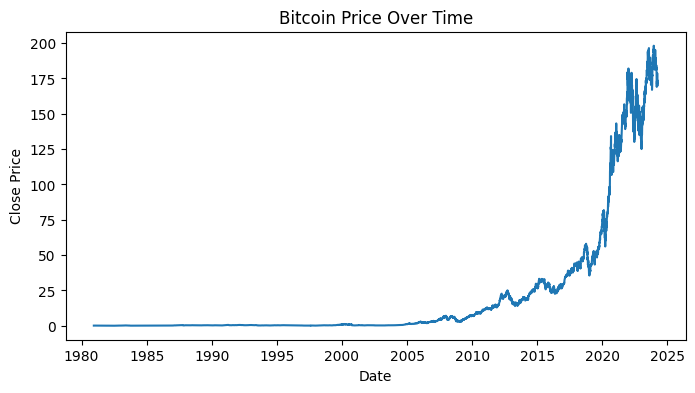

In [500]:
plt.figure(figsize=(8, 4))
plt.plot(apple['Date'],apple['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Bitcoin Price Over Time')
plt.show()

In [501]:
apple_test=apple[apple['Date']>='2010-01-01'].copy()
apple_test

,Date,Open,High,Low,Close,Adj Close,Volume
7331,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470742,493729600
7332,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481929,601904800
7333,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378822,552160000
7334,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367032,477131200
7335,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409363,447610800
...,...,...,...,...,...,...,...
10908,2024-03-21,177.050003,177.490005,170.839996,171.369995,171.369995,106181300
10909,2024-03-22,171.759995,173.050003,170.059998,172.279999,172.279999,71106600
10910,2024-03-25,170.570007,171.940002,169.449997,170.850006,170.850006,54288300
10911,2024-03-26,170.000000,171.419998,169.580002,169.710007,169.710007,57388400


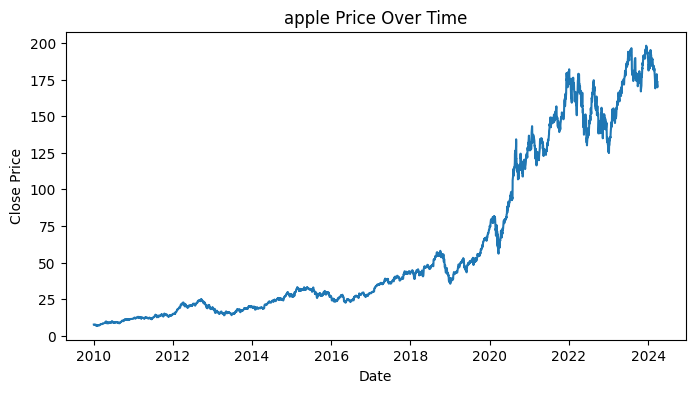

In [502]:
plt.figure(figsize=(8, 4))
plt.plot(apple_test['Date'],apple_test['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('apple Price Over Time')
plt.show()

In [503]:
x=apple_test["Date"]
apple_test.set_index("Date", inplace=True)

In [504]:
apple_test['aapl_close']=apple_test['Close']
combind=apple_test.drop(['Open','High','Low','Adj Close','Volume','Close'], axis=1)
combind


,aapl_close
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714
...,...
2024-03-21,171.369995
2024-03-22,172.279999
2024-03-25,170.850006


# factor: Moving average

<Axes: xlabel='Date'>

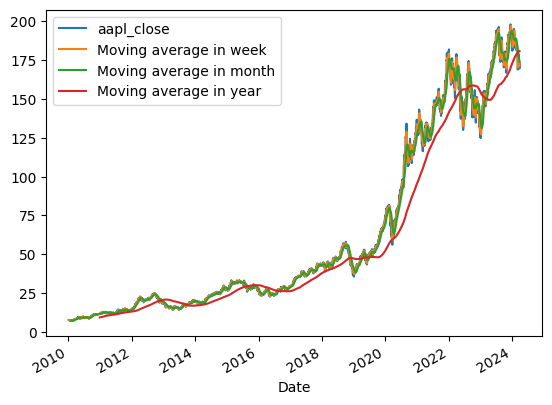

In [505]:
combind['Moving average in week'] = combind['aapl_close'].rolling(window=5).mean()
combind['Moving average in month'] = combind['aapl_close'].rolling(window=22).mean()
combind['Moving average in year'] = combind['aapl_close'].rolling(window=250).mean()
combind.plot()

# factor:daily reutrn and Volatility

<Axes: xlabel='Date'>

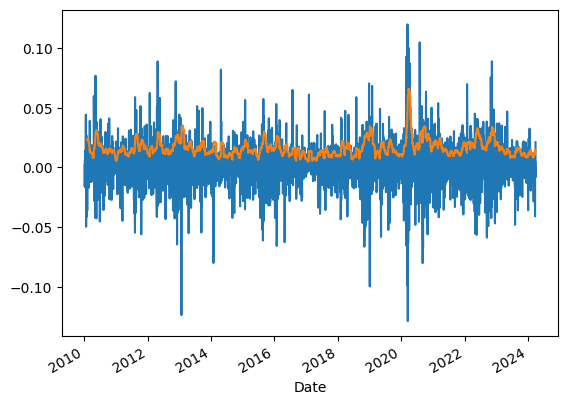

In [506]:
combind['daily reutrn']=apple_test['Close'].pct_change()
combind['Volatility']=combind['daily reutrn'].rolling(window=22).std()

combind['daily reutrn'].plot()
combind['Volatility'].plot()

# factor:TSM

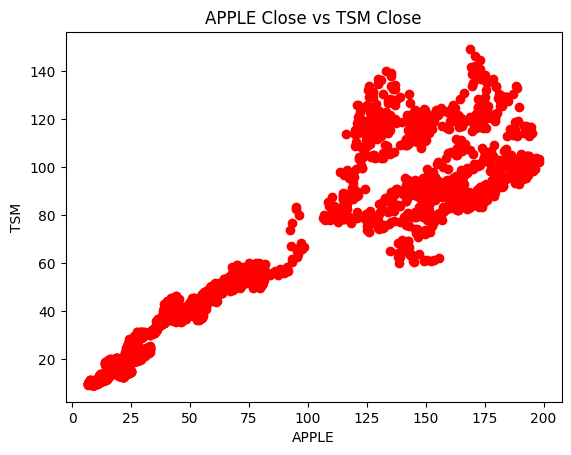

Correlation: 0.9491134114499875


In [515]:
TSM=pd.read_csv("/content/TSM.csv")
TSM['Date']=pd.to_datetime(TSM['Date'])
TSM.set_index("Date", inplace=True)
combind['TSM']=TSM['Close']
plt.scatter(combind['aapl_close'], combind['TSM'],color='red')
plt.title('APPLE Close vs TSM Close')
plt.xlabel('APPLE')
plt.ylabel('TSM')
plt.show()
#find correlation of two data
print("Correlation:", combind['aapl_close'].corr(combind['TSM']))



factor:other competitors

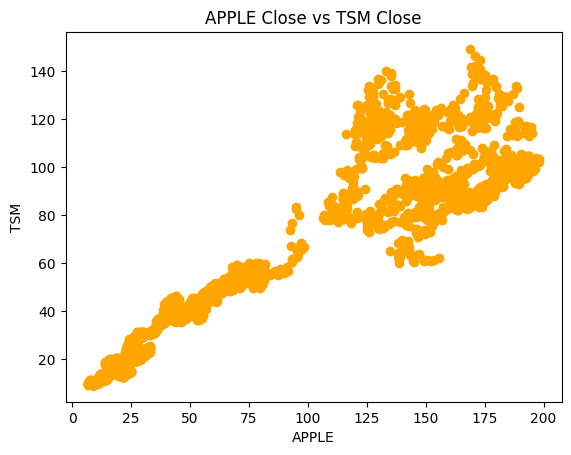

Correlation: 0.9491134114499875


In [516]:
TSM=pd.read_csv("/content/TSM.csv")
TSM['Date']=pd.to_datetime(TSM['Date'])
TSM.set_index("Date", inplace=True)
combind['TSM']=TSM['Close']
plt.scatter(combind['aapl_close'], combind['TSM'],color='orange')
plt.title('APPLE Close vs TSM Close')
plt.xlabel('APPLE')
plt.ylabel('TSM')
plt.show()
#find correlation of two data
print("Correlation:", combind['aapl_close'].corr(combind['TSM']))

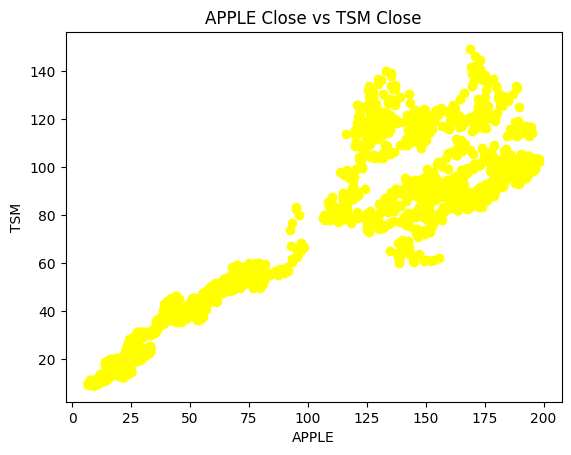

Correlation: 0.9491134114499875


In [517]:
TSM=pd.read_csv("/content/TSM.csv")
TSM['Date']=pd.to_datetime(TSM['Date'])
TSM.set_index("Date", inplace=True)
combind['TSM']=TSM['Close']
plt.scatter(combind['aapl_close'], combind['TSM'],color='yellow')
plt.title('APPLE Close vs TSM Close')
plt.xlabel('APPLE')
plt.ylabel('TSM')
plt.show()
#find correlation of two data
print("Correlation:", combind['aapl_close'].corr(combind['TSM']))

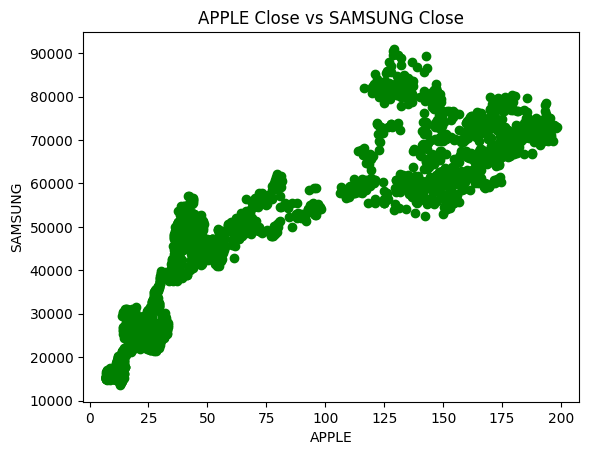

Correlation: 0.9034576239387868


In [518]:
SAM=pd.read_csv("/content/005930.KS-2.csv")
SAM['Date']=pd.to_datetime(SAM['Date'])
SAM.set_index("Date", inplace=True)
combind['SAM']=SAM['Close']
plt.scatter(combind['aapl_close'], combind['SAM'],color='green')
plt.title('APPLE Close vs SAMSUNG Close')
plt.xlabel('APPLE')
plt.ylabel('SAMSUNG')
plt.show()
#find correlation of two data
print("Correlation:", combind['aapl_close'].corr(combind['SAM']))

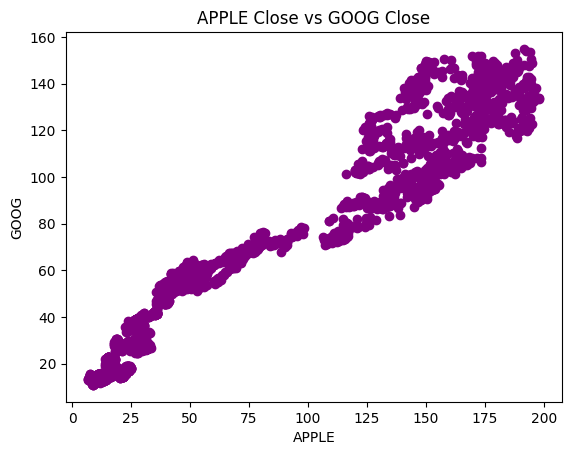

Correlation: 0.9689973103594773


In [522]:
GOOG=pd.read_csv("/content/GOOG.csv")
GOOG['Date']=pd.to_datetime(GOOG['Date'])
GOOG.set_index("Date", inplace=True)
combind['GOOG']=GOOG['Close']
plt.scatter(combind['aapl_close'], combind['GOOG'],color='purple')
plt.title('APPLE Close vs GOOG Close')
plt.xlabel('APPLE')
plt.ylabel('GOOG')
plt.show()
#find correlation of two data
print("Correlation:", combind['aapl_close'].corr(combind['GOOG']))

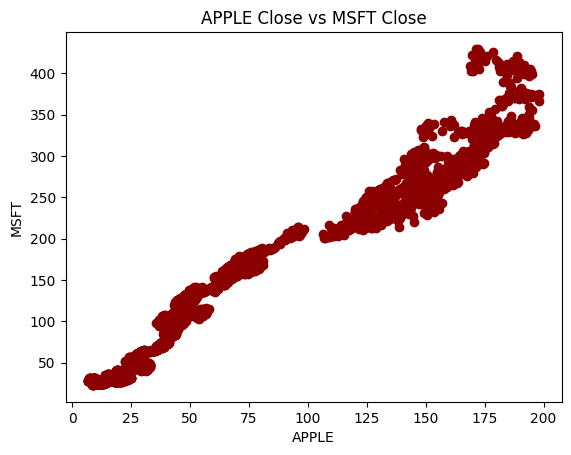

Correlation: 0.9859058602138215


In [523]:
MSFT=pd.read_csv("/content/MSFT.csv")
MSFT['Date']=pd.to_datetime(MSFT['Date'])
MSFT.set_index("Date", inplace=True)
combind['MSFT']=MSFT['Close']
plt.scatter(combind['aapl_close'], combind['MSFT'],color='darkred')
plt.title('APPLE Close vs MSFT Close')
plt.xlabel('APPLE')
plt.ylabel('MSFT')
plt.show()
#find correlation of two data
print("Correlation:", combind['aapl_close'].corr(combind['MSFT']))

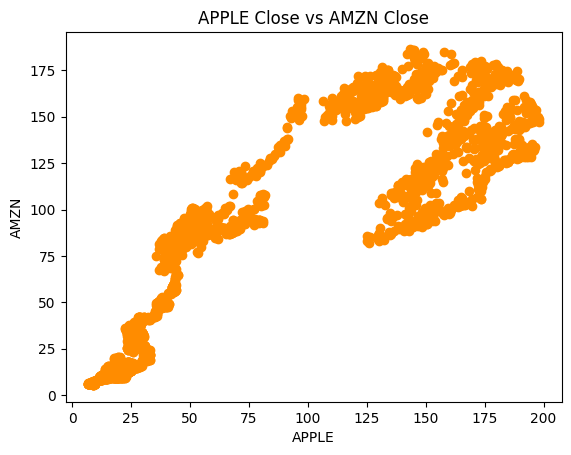

Correlation: 0.8978847481686433


In [524]:
AMZN=pd.read_csv("/content/AMZN.csv")
AMZN['Date']=pd.to_datetime(AMZN['Date'])
AMZN.set_index("Date", inplace=True)
combind['AMZN']=AMZN['Close']
plt.scatter(combind['aapl_close'], combind['AMZN'],color='darkorange')
plt.title('APPLE Close vs AMZN Close')
plt.xlabel('APPLE')
plt.ylabel('AMZN')
plt.show()
#find correlation of two data
print("Correlation:", combind['aapl_close'].corr(combind['AMZN']))

# factor:S&P 500

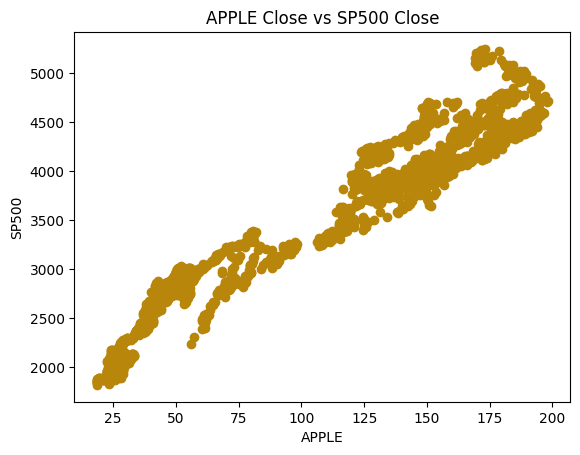

Correlation: 0.969452751536182


In [526]:
SP500=pd.read_csv("/content/HistoricalData_1711696526998.csv")
SP500['Date']=pd.to_datetime(SP500['Date'])
SP500.set_index("Date", inplace=True)
combind['SP500']=SP500['Close/Last']
plt.scatter(combind['aapl_close'], combind['SP500'],color='darkgoldenrod')
plt.title('APPLE Close vs SP500 Close')
plt.xlabel('APPLE')
plt.ylabel('SP500')
plt.show()
#find correlation of two data
print("Correlation:", combind['aapl_close'].corr(combind['SP500']))

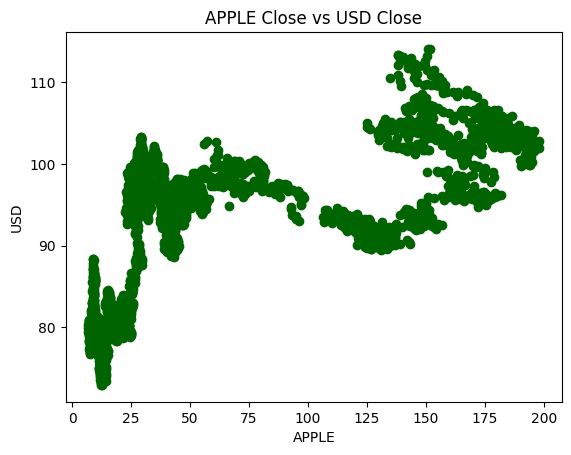

Correlation: 0.662455558917598


In [527]:
USD=pd.read_csv("/content/DX-Y.NYB.csv")
USD['Date']=pd.to_datetime(USD['Date'])
USD.set_index("Date", inplace=True)
combind['USD']=USD['Close']
plt.scatter(combind['aapl_close'], combind['USD'],color='darkgreen')
plt.title('APPLE Close vs USD Close')
plt.xlabel('APPLE')
plt.ylabel('USD')
plt.show()
#find correlation of two data
print("Correlation:", combind['aapl_close'].corr(combind['USD']))

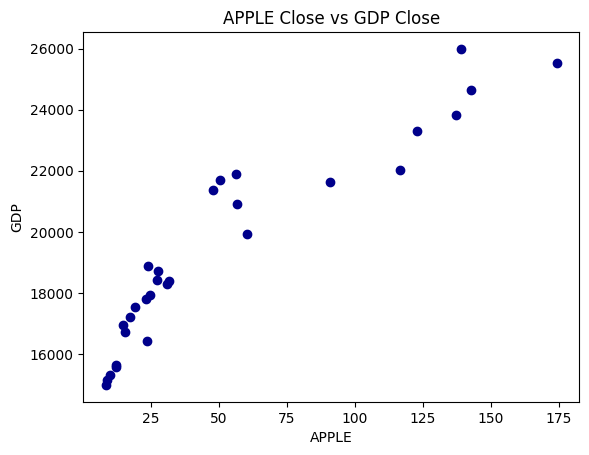

Correlation: 0.9308959812244072


In [528]:
GDP=pd.read_csv("/content/GDP.csv")
GDP['Date']=pd.to_datetime(GDP['DATE'])
GDP.set_index("Date", inplace=True)
GDP=GDP.drop(['DATE'],axis=1)
combind['GDP']=GDP
plt.scatter(combind['aapl_close'], combind['GDP'],color='darkblue')
plt.title('APPLE Close vs GDP Close')
plt.xlabel('APPLE')
plt.ylabel('GDP')
plt.show()
#find correlation of two data
print("Correlation:", combind['aapl_close'].corr(combind['GDP']))

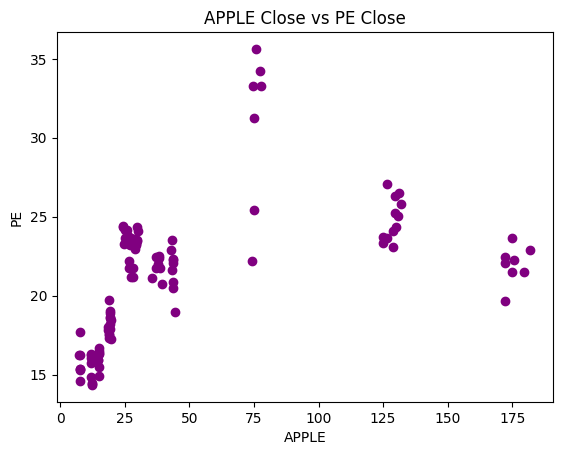

Correlation: 0.48608709034799163


In [530]:
PE=pd.read_csv("/content/sp-500-pe-ratio-price-to-earnings-chart.csv")
PE['Date']=pd.to_datetime(PE['date'])
PE.set_index("Date", inplace=True)
PE=PE.drop(['date'],axis=1)
combind['PE']=PE
plt.scatter(combind['aapl_close'], combind['PE'],color='#800080')
plt.title('APPLE Close vs PE Close')
plt.xlabel('APPLE')
plt.ylabel('PE')
plt.show()
#find correlation of two data
print("Correlation:", combind['aapl_close'].corr(combind['PE']))

In [479]:
#as PE have lower realtionship with aaple, so drop it
combind=combind.drop('PE', axis=1)

In [480]:
combind=combind.fillna(method='ffill')
combind=combind.dropna()
feature=['aapl_close','Moving average in week','Moving average in month','Moving average in year','daily reutrn','Volatility','TSM','SAM','GOOG','MSFT','AMZN','SP500','USD','GDP']

In [481]:
combind

,aapl_close,Moving average in week,Moving average in month,Moving average in year,daily reutrn,Volatility,TSM,SAM,GOOG,MSFT,AMZN,SP500,USD,GDP
Date,,,,,,,,,,,,,,
2014-03-31,19.169287,19.255929,19.032046,17.475960,-0.000223,0.006732,20.020000,26860.0,27.772251,40.990002,16.818501,1872.34,80.099998,17192.019
2014-04-01,19.344643,19.232072,19.057062,17.492236,0.009148,0.006910,20.320000,26780.0,28.280355,41.419998,17.149500,1885.52,80.080002,17518.508
2014-04-02,19.376785,19.251857,19.081071,17.509286,0.001662,0.006902,20.040001,27140.0,28.272379,41.349998,17.098000,1890.90,80.220001,17518.508
2014-04-03,19.242500,19.261357,19.093328,17.525369,-0.006930,0.007008,19.940001,27800.0,28.409002,41.009998,16.681000,1888.77,80.470001,17518.508
2014-04-04,18.993570,19.225357,19.092451,17.540346,-0.012936,0.007572,19.770000,27600.0,27.082645,39.869999,16.150000,1865.09,80.419998,17518.508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-21,171.369995,174.491998,175.975909,180.749240,-0.040857,0.014545,139.449997,79300.0,148.740005,429.369995,178.149994,5241.53,104.000000,25994.639
2024-03-22,172.279999,174.423999,175.519545,180.797360,0.005310,0.014572,140.539993,78900.0,151.770004,428.739990,178.869995,5234.18,104.430000,25994.639
2024-03-25,170.850006,173.850000,174.905000,180.847640,-0.008300,0.014289,140.229996,78200.0,151.149994,422.859985,179.710007,5218.19,104.230003,25994.639


# MODEL:LSTM

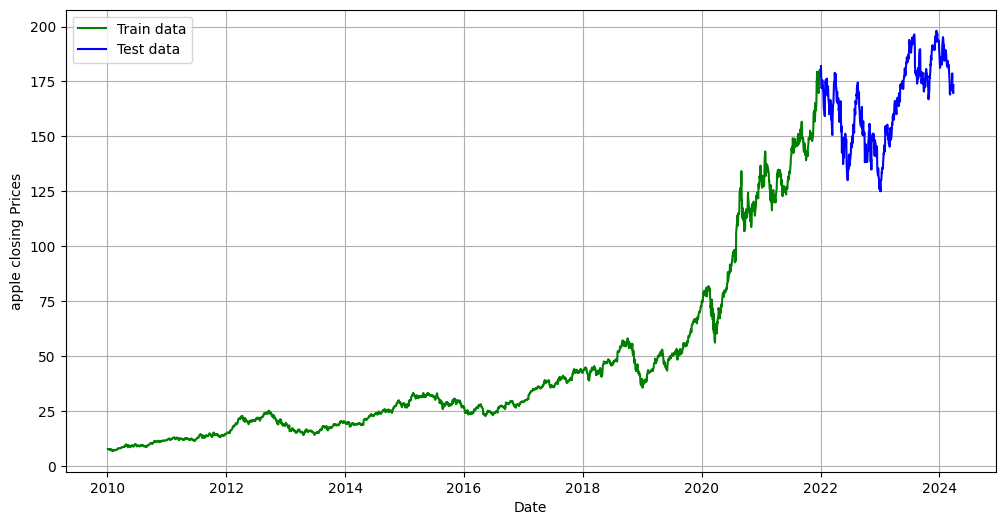

In [544]:
train=combind[combind.index <'2022-01-01']
#train_predictor=train.filter(['aapl_close'])
#train=train.drop('aapl_close',axis=1)


test=combind[combind.index >='2022-01-01']
#test_predictor=test.filter(['aapl_close'])
#test=test.drop('aapl_close',axis=1)
#train_predictor

#num_steps = 60
#num_features = 14#change number when add a new feature
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel("apple closing Prices")
plt.plot(train['aapl_close'], 'green', label= 'Train data')
plt.plot(test['aapl_close'],'blue', label='Test data')
plt.legend()

In [483]:
sc = MinMaxScaler(feature_range=(0, 1))
sc_train=sc.fit_transform(train)
sc_test=sc.transform(test)

In [484]:
def create_sequences(data, num_steps):
    x=[]
    y=[]

    for i in range(len(data) - num_steps):
        x.append(data[i:i + num_steps])
        y.append(data[i + num_steps, 0])
    return np.array(x), np.array(y)

In [485]:
#Here to form four sets of array
x_train, y_train = create_sequences(sc_train, 59)#here can change the window size
x_test, y_test = create_sequences(sc_test, 59)#here can change the window size

In [486]:
x_train = x_train.reshape((x_train.shape[0], 59, 14))#here can change the window size,feature size
x_test = x_test.reshape((x_test.shape[0], 59, 14))#here can change the window size

In [488]:
model = Sequential()
model.add(LSTM(60, return_sequences=True, input_shape=(59, 14)))#here can change the window size,feature size
model.add(LSTM(60, return_sequences=True))
model.add(LSTM(60))
model.add(Dense(1))  # Output layer with 1 neuron for regression
model.compile(optimizer='adam', loss='mse')

#monitor the validation loss during training and stop training early if
#the loss does not improve for a certain number of epochs.
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model.fit(x_train, y_train, epochs=100, batch_size=64, verbose=2, validation_data=(x_test[7:], y_test[7:]))



Epoch 1/100
30/30 - 10s - loss: 0.0048 - val_loss: 0.0163 - 10s/epoch - 344ms/step
Epoch 2/100
30/30 - 4s - loss: 9.0872e-04 - val_loss: 0.0101 - 4s/epoch - 143ms/step
Epoch 3/100
30/30 - 3s - loss: 5.6142e-04 - val_loss: 0.0032 - 3s/epoch - 108ms/step
Epoch 4/100
30/30 - 3s - loss: 5.3862e-04 - val_loss: 0.0023 - 3s/epoch - 108ms/step
Epoch 5/100
30/30 - 4s - loss: 5.1904e-04 - val_loss: 0.0033 - 4s/epoch - 144ms/step
Epoch 6/100
30/30 - 3s - loss: 4.1563e-04 - val_loss: 0.0022 - 3s/epoch - 107ms/step
Epoch 7/100
30/30 - 3s - loss: 4.4083e-04 - val_loss: 0.0026 - 3s/epoch - 106ms/step
Epoch 8/100
30/30 - 3s - loss: 4.5762e-04 - val_loss: 0.0037 - 3s/epoch - 109ms/step
Epoch 9/100
30/30 - 4s - loss: 3.5356e-04 - val_loss: 0.0036 - 4s/epoch - 145ms/step
Epoch 10/100
30/30 - 3s - loss: 3.5175e-04 - val_loss: 0.0048 - 3s/epoch - 109ms/step
Epoch 11/100
30/30 - 3s - loss: 3.2896e-04 - val_loss: 0.0053 - 3s/epoch - 109ms/step
Epoch 12/100
30/30 - 4s - loss: 2.9763e-04 - val_loss: 0.0031 - 4

In [489]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

16/16 [==============================] - 0s 28ms/step


In [490]:
zero_set = np.ones((train_predict.shape[0], 13))
train_predict_combined = np.hstack((train_predict, zero_set))
train_predict = sc.inverse_transform(train_predict_combined)[:, 0]
#train_predict = train_predict[:, 0]

zero_set = np.ones((test_predict.shape[0], 13))
test_predict_combined = np.hstack((test_predict, zero_set))
test_predict = sc.inverse_transform(test_predict_combined)[:, 0]
#test_predict = test_predict[:, 0]

zeros_set_train = np.ones((y_train.shape[0], 13))
y_train_combined = np.hstack((y_train.reshape(-1, 1), zeros_set_train))
y_train = sc.inverse_transform(y_train_combined)[:, 0]
#y_train = y_train_combined[:, 0]

zeros_set_test = np.ones((y_test.shape[0], 13))
y_test_combined = np.hstack((y_test.reshape(-1, 1), zeros_set_test))
y_test = sc.inverse_transform(y_test_combined)[:, 0]
#y_test = y_test_combined[:, 0]

In [491]:
#train_mse =
#test_mse = mean_squared_error(y_test, test_predict)

print("The train MSE is: ",mean_squared_error(y_train, train_predict))
print("The test MSE is: ", mean_squared_error(y_test, test_predict))


The train MSE is:  1.8125884826506145
The test MSE is:  36.95239780376291


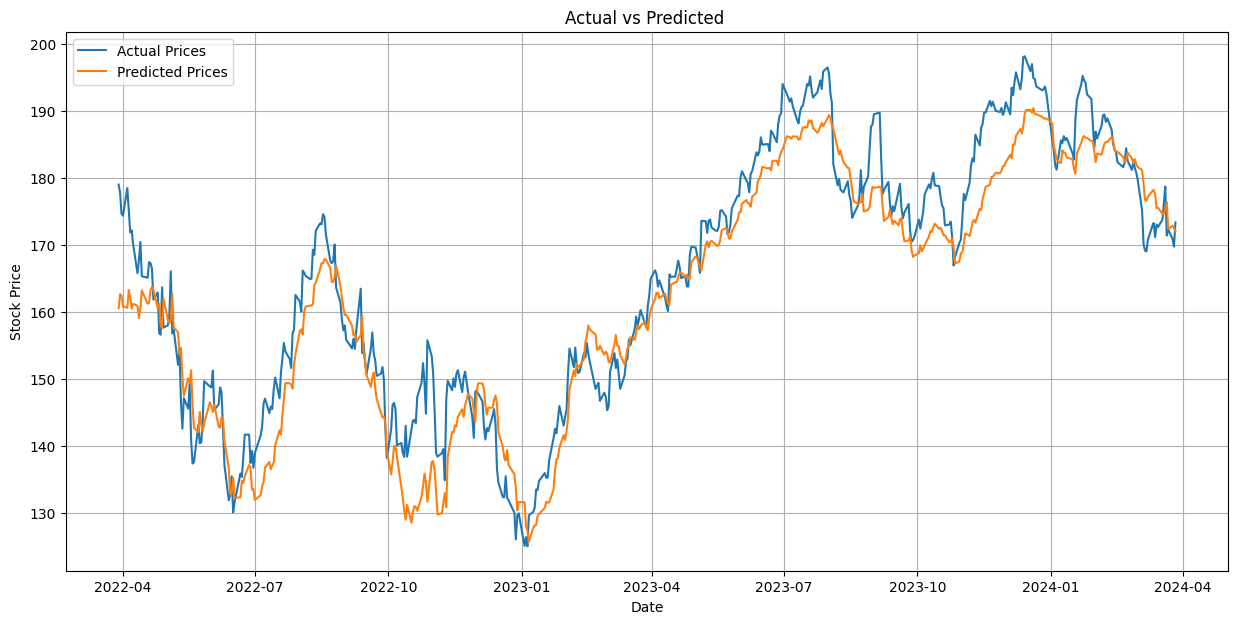

In [492]:
predictions= pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': test_predict.flatten()}, index=test.index[59:])#here can change the window size
plt.figure(figsize=(15, 7))
plt.plot(predictions.index, predictions['Actual'], label='Actual Prices')
plt.plot(predictions.index, predictions['Predicted'], label='Predicted Prices')
plt.title('Actual vs Predicted ')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [494]:
"""input_seq = sc_test[-60:]

prediction_new = []

for _ in range(100):
    input_seq_reshaped = input_seq.reshape((1, 60, 14))
    prediction1 = model.predict(input_seq_reshaped)
    prediction_new.append(prediction1[0, 0])
    new_step = np.zeros((1, 14))
    new_step[0, 0] = prediction1
    new_step[0, 1:] = input_seq[-1, :-1]
    input_seq = np.concatenate((input_seq[1:], new_step), axis=0)

zeros_array = np.zeros((len(prediction_new), 13))
prediction_new_combined = np.hstack((np.array(prediction_new).reshape(-1, 1), zeros_array))
prediction_new = sc.inverse_transform(prediction_new_combined)
prediction_new = prediction_new[:, 0]

next_100 = pd.date_range(start=apple_test.index[-1] + pd.DateOffset(days=1), periods=100)
predictions = pd.DataFrame(prediction_new, index=next_100, columns=['Predicted'])

plt.figure(figsize=(10, 6))
plt.plot(predictions.index, predictions['Predicted'], label='Predicted Prices', color='r')
plt.title('Predicted of Next 100 Days')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()"""

"input_seq = sc_test[-60:]\n\nprediction_new = []\n\nfor _ in range(100):\n    input_seq_reshaped = input_seq.reshape((1, 60, 14))\n    prediction1 = model.predict(input_seq_reshaped)\n    prediction_new.append(prediction1[0, 0])\n    new_step = np.zeros((1, 14))\n    new_step[0, 0] = prediction1\n    new_step[0, 1:] = input_seq[-1, :-1]\n    input_seq = np.concatenate((input_seq[1:], new_step), axis=0)\n\nzeros_array = np.zeros((len(prediction_new), 13))\nprediction_new_combined = np.hstack((np.array(prediction_new).reshape(-1, 1), zeros_array))\nprediction_new = sc.inverse_transform(prediction_new_combined)\nprediction_new = prediction_new[:, 0]\n\nnext_100 = pd.date_range(start=apple_test.index[-1] + pd.DateOffset(days=1), periods=100)\npredictions = pd.DataFrame(prediction_new, index=next_100, columns=['Predicted'])\n\nplt.figure(figsize=(10, 6))\nplt.plot(predictions.index, predictions['Predicted'], label='Predicted Prices', color='r')\nplt.title('Predicted of Next 100 Days')\nplt

In [493]:
"""plt.figure(figsize=(10, 6))
plt.plot(predictions.index, predictions['Predicted'], label='Predicted Prices', color='r')
plt.title('Predicted of Next 100 Days')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()"""

"plt.figure(figsize=(10, 6))\nplt.plot(predictions.index, predictions['Predicted'], label='Predicted Prices', color='r')\nplt.title('Predicted of Next 100 Days')\nplt.xlabel('Date')\nplt.ylabel('Stock Price')\nplt.legend()\nplt.grid(True)\nplt.show()"